In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSLo2NoEd47ZPZnEeDQBO95NHxvMsUi7YG4nH9DEiDfMJIV2q5Qk0fPQX5J10ClRB7ixPrCbfkTHcTh/pub?output=csv "
data = pd.read_csv(url)

In [3]:
# Definir las columnas de interés
columnas_objetivo = ['Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
                     'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
                     'Shot Power', 'Long Shots', 'Volleys', 'Penalties',
                     'Vision', 'Crossing', 'Free Kick Accuracy', 'Short Passing',
                     'Long Passing', 'Curve', 'Dribbling', 'Agility',
                     'Balance', 'Reactions', 'Ball Control', 'Composure',
                     'Interceptions', 'Heading Accuracy', 'Def Awareness',
                     'Standing Tackle', 'Sliding Tackle', 'Jumping',
                     'Stamina', 'Strength', 'Aggression', 'Weak foot',
                     'Skill moves', 'Age', 'GK Diving', 'GK Handling',
                     'GK Kicking', 'GK Positioning', 'GK Reflexes',
                     'Preferred foot', 'Nation', 'Position']  # Lista de columnas a conservar

columnas = data.columns  # Obtiene todas las columnas del DataFrame 'data'

# Iterar sobre las columnas
for col in columnas:
    if col not in columnas_objetivo:  # Si la columna no está en la lista de objetivos
        data.drop(col, axis=1, inplace=True)  # Elimina la columna del DataFrame
    else:
        data[col] = data[col]  # Si está en la lista, simplemente re-asigna (esto no cambia nada)


In [4]:
#Imputar datos faltantes para las categorías de GK cambiando NaN por 0
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
data[gk_columns] = data[gk_columns].fillna(0)

In [5]:
### Ahora extraeremos los datos
X = data.iloc[:, 1:-1].values  # Extrae todos los valores del DataFrame 'data' excepto la primera columna (índice 0) y la última (la variable objetivo)

In [6]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder  # Importa la clase LabelEncoder del módulo de preprocesamiento de scikit-learn

# Crear el codificador
le = LabelEncoder()  # Instancia el codificador de etiquetas

# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])  # Aplica la codificación a la columna del pie preferido (penúltima columna) y reemplaza los valores originales

# Codificar la última columna (Nation)
X[:, -1] = le.fit_transform(X[:, -1])  # Aplica la codificación a la columna de la nacionalidad (última columna) y reemplaza los valores originales

In [7]:
df = pd.DataFrame(X)
for col in df.columns:
    # Convertir a numérico, forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
X = df.values

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
X = imputer.transform(X)

In [10]:
X_ = X[:,:-1]  #### Eligiendo todos los datos, excepto la nacionalidad

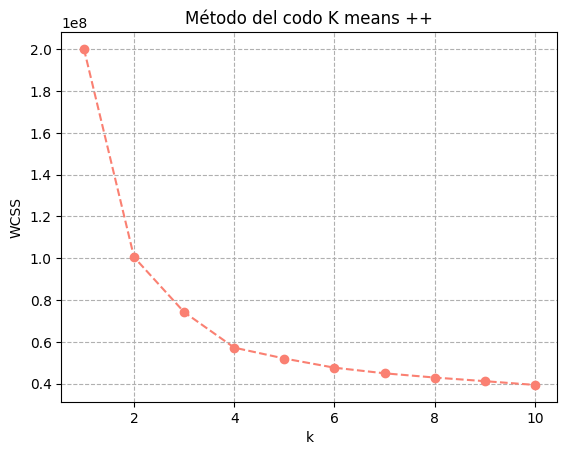

In [11]:
from sklearn.cluster import KMeans
## Inicializo donde almaceno el WCCS(k)
WCSS = []

for k in range(1,11):
  kpp = KMeans(n_clusters= k,
               init = 'k-means++',
               random_state=42, n_init = 'auto')
  kpp.fit(X_)
  WCSS.append(kpp.inertia_)

plt.figure()
plt.plot(range(1,11), WCSS, 'o--', color = 'salmon')
plt.title('Método del codo K means ++')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(linestyle = '--')
plt.show()

In [12]:
from sklearn.cluster import KMeans

kmeans_mas = KMeans(n_clusters=4, random_state=42, init = 'k-means++')
clusters_kmeans_mas = kmeans_mas.fit_predict(X_)

In [13]:
### Ver centroides
centroides_kmeans_mas = kmeans_mas.cluster_centers_
centroides_kmeans_mas

array([[ 6.58039639e+01,  7.30671115e+01,  6.27686421e+01,
         5.75673077e+01,  6.65661303e+01,  3.32148744e+01,
         6.03475275e+01,  7.31840659e+01,  7.29531005e+01,
         6.43479199e+01,  6.40657378e+01,  6.51361852e+01,
         5.94497645e+01,  5.62496075e+01,  5.93618524e+01,
         5.92382261e+01,  5.41350078e+01,  4.98153454e+01,
         6.19599686e+01,  5.27468603e+01,  5.55781005e+01,
         6.64729199e+01,  7.11840659e+01,  6.95837912e+01,
         6.15011774e+01,  6.63779435e+01,  6.07388148e+01,
         2.95282575e+01,  5.47343014e+01,  3.09636970e+01,
         3.19097331e+01,  2.92580455e+01,  6.61291209e+01,
         6.34425039e+01,  6.21283359e+01,  5.04640895e+01,
         3.12715856e+00,  2.87519623e+00,  2.47327316e+01,
         1.58983937e-13,  9.32587341e-14,  6.15507645e-13,
         3.38395978e-13, -2.94875235e-13,  7.87284144e-01],
       [ 6.54262131e+01,  6.58829415e+01,  6.39144572e+01,
         6.30215108e+01,  6.67453727e+01,  3.58204102e+

In [14]:
from sklearn.decomposition import PCA
X_ = X[:,:-1]
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)

In [15]:
X_pca = pca.fit_transform(X_)

In [16]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='viridis',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

In [17]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                         c=clusters, cmap='viridis', s=100,
                         edgecolor='white', alpha=0.6)

    # Etiquetas de los ejes y título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir la leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Mostrar el gráfico
    plt.show()

In [18]:
centroides_kmeans_mas_pca = pca.transform(centroides_kmeans_mas)
centroides_kmeans_mas_pca

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

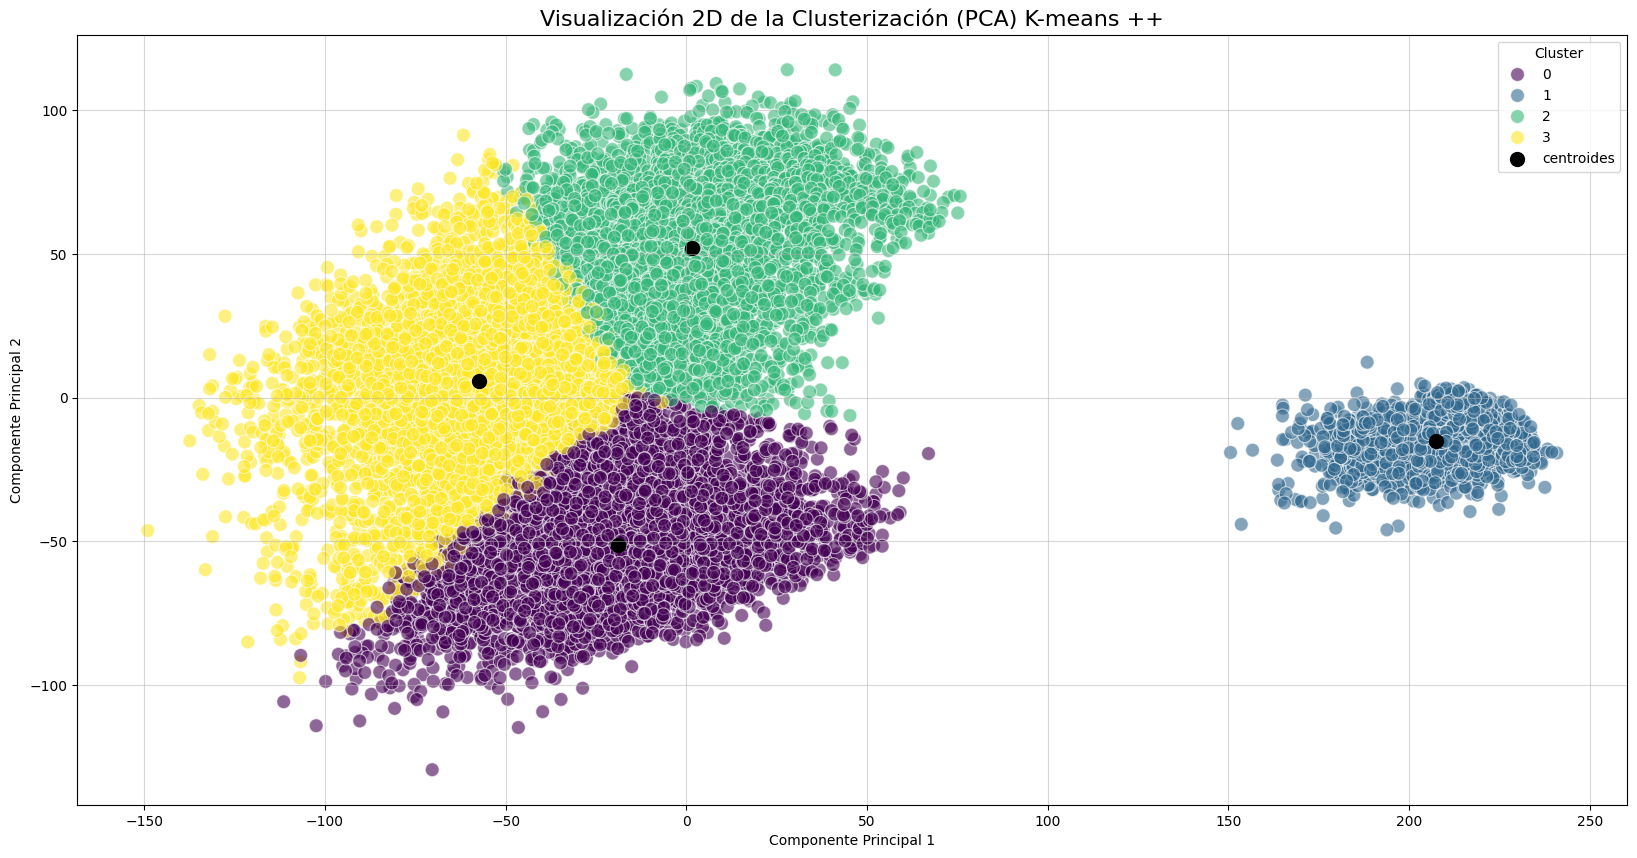

In [19]:
graficar_clusters_PCA2D(clusters_kmeans_mas, 'K-means ++', centroides_kmeans_mas_pca)

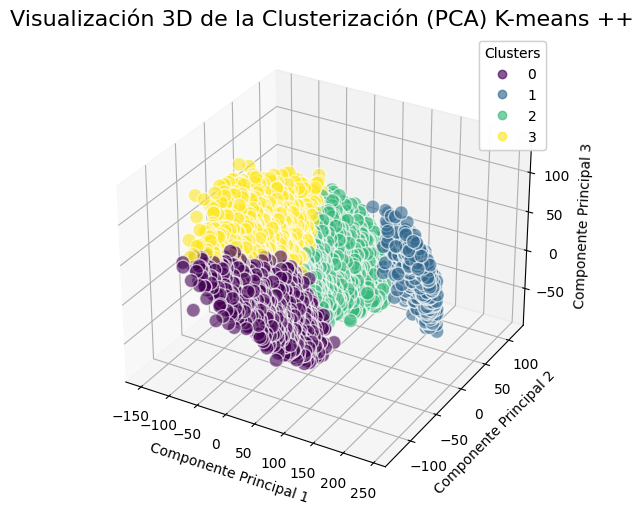

In [20]:
graficar_clusters_PCA3D(clusters_kmeans_mas, 'K-means ++')